In [2]:
import sys
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msno
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
dframe = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Marvel%20VS%20DC%20IMDB%20Dataset/Marvel_DC_imdb.csv')

In [4]:
dframe.head()

,Unnamed: 0,Movie,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category
0,0,Eternals,(2021),"Action,Adventure,Drama",NaN,NaN,ChloéZhao,"AngelinaJolie,GemmaChan,RichardMadden,BarryKeo...","The saga of the Eternals, a race of immortal b...",NaN,NaN,NaN,NaN,Marvel
1,1,Loki,(2021– ),"Action,Adventure,Fantasy",NaN,NaN,NaN,"TomHiddleston,OwenWilson,SophiaDiMartino,Richa...",A new Marvel chapter with Loki at its center.,NaN,NaN,NaN,NaN,Marvel
2,2,The Falcon and the Winter Soldier,(2021),"Action,Adventure,Drama",50 min,TV-14,NaN,"AnthonyMackie,SebastianStan,WyattRussell,ErinK...","Following the events of 'Avengers: Endgame,' S...",7.5,NaN,"105,557",NaN,Marvel
3,3,WandaVision,(2021),"Action,Comedy,Drama",350 min,TV-PG,NaN,"ElizabethOlsen,PaulBettany,KathrynHahn,Teyonah...",Blends the style of classic sitcoms with the M...,8.1,NaN,"174,710",NaN,Marvel
4,4,Spider-Man: No Way Home,(2021),"Action,Adventure,Sci-Fi",NaN,NaN,JonWatts,"AngourieRice,TomHolland,Zendaya,MarisaTomei",A continuation of Spider-Man: Far From Home.,NaN,NaN,NaN,NaN,Marvel


In [5]:
dframe.isna().sum()

Unnamed: 0        0
Movie             0
Year             33
Genre             7
RunTime         283
Rating          227
Director        216
Actor            30
Description       0
IMDB_Score      204
Metascore      1625
Votes           204
USA_Gross      1626
Category          0
dtype: int64

In [6]:
dframe.shape

(1690, 14)

<AxesSubplot:>

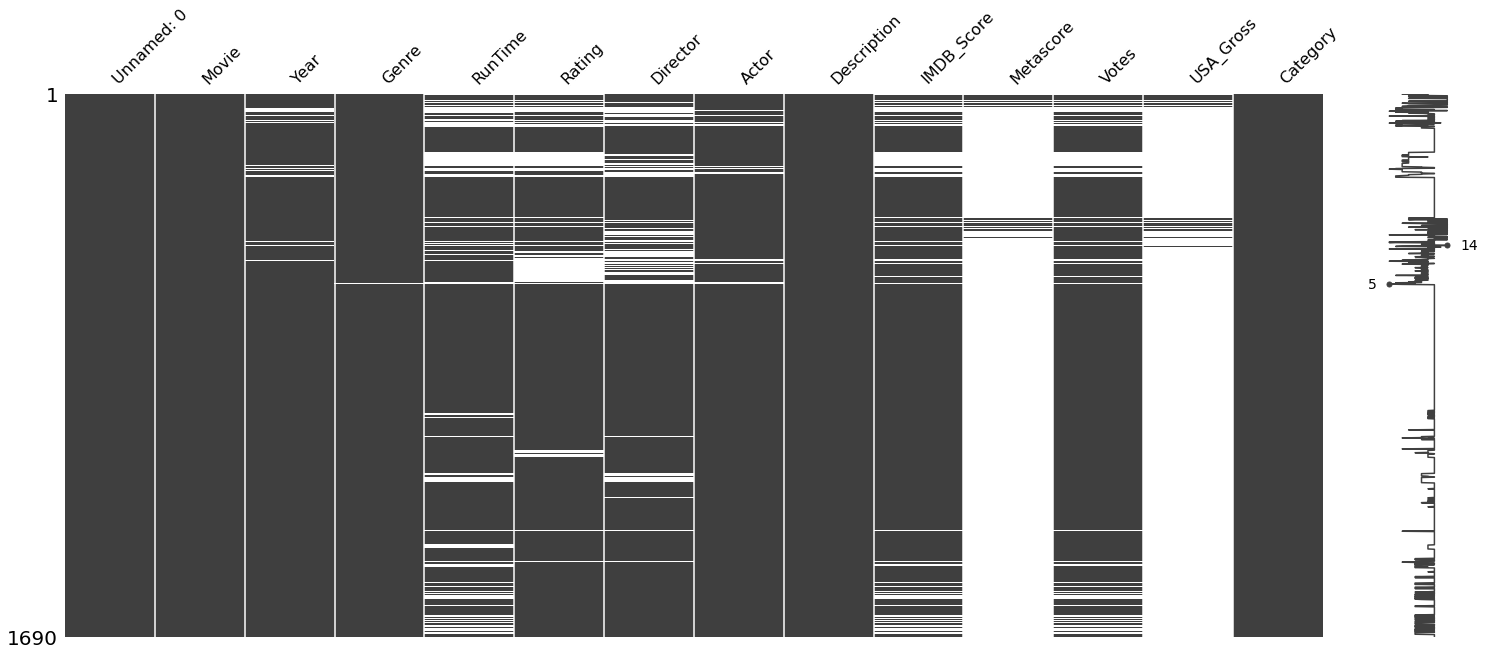

In [7]:
msno.matrix(dframe)

In [8]:
dframe = dframe.drop(columns=['USA_Gross', 'Metascore', 'Unnamed: 0'])
dframe.head()

,Movie,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Votes,Category
0,Eternals,(2021),"Action,Adventure,Drama",NaN,NaN,ChloéZhao,"AngelinaJolie,GemmaChan,RichardMadden,BarryKeo...","The saga of the Eternals, a race of immortal b...",NaN,NaN,Marvel
1,Loki,(2021– ),"Action,Adventure,Fantasy",NaN,NaN,NaN,"TomHiddleston,OwenWilson,SophiaDiMartino,Richa...",A new Marvel chapter with Loki at its center.,NaN,NaN,Marvel
2,The Falcon and the Winter Soldier,(2021),"Action,Adventure,Drama",50 min,TV-14,NaN,"AnthonyMackie,SebastianStan,WyattRussell,ErinK...","Following the events of 'Avengers: Endgame,' S...",7.5,"105,557",Marvel
3,WandaVision,(2021),"Action,Comedy,Drama",350 min,TV-PG,NaN,"ElizabethOlsen,PaulBettany,KathrynHahn,Teyonah...",Blends the style of classic sitcoms with the M...,8.1,"174,710",Marvel
4,Spider-Man: No Way Home,(2021),"Action,Adventure,Sci-Fi",NaN,NaN,JonWatts,"AngourieRice,TomHolland,Zendaya,MarisaTomei",A continuation of Spider-Man: Far From Home.,NaN,NaN,Marvel


In [9]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        1690 non-null   object 
 1   Year         1657 non-null   object 
 2   Genre        1683 non-null   object 
 3   RunTime      1407 non-null   object 
 4   Rating       1463 non-null   object 
 5   Director     1474 non-null   object 
 6   Actor        1660 non-null   object 
 7   Description  1690 non-null   object 
 8   IMDB_Score   1486 non-null   float64
 9   Votes        1486 non-null   object 
 10  Category     1690 non-null   object 
dtypes: float64(1), object(10)
memory usage: 145.4+ KB


In [10]:
dframe.describe()

,IMDB_Score
count,1486.000000
mean,7.821467
std,0.918777
min,1.100000
25%,7.300000
50%,8.000000
75%,8.500000
max,9.600000


In [11]:
dframe = dframe.dropna(axis=0) 
dframe.isna().sum()

Movie          0
Year           0
Genre          0
RunTime        0
Rating         0
Director       0
Actor          0
Description    0
IMDB_Score     0
Votes          0
Category       0
dtype: int64

In [12]:
dframe.shape

(1247, 11)

In [13]:
dframe.columns

Index(['Movie', 'Year', 'Genre', 'RunTime', 'Rating', 'Director', 'Actor',
       'Description', 'IMDB_Score', 'Votes', 'Category'],
      dtype='object')

In [14]:
dframe.Rating.value_counts

<bound method IndexOpsMixin.value_counts of 6       PG-13
7       PG-13
9       PG-13
10      PG-13
11      PG-13
        ...  
1685    TV-14
1686    TV-PG
1687    TV-PG
1688    TV-PG
1689    TV-PG
Name: Rating, Length: 1247, dtype: object>

In [15]:
dframe.dtypes

Movie           object
Year            object
Genre           object
RunTime         object
Rating          object
Director        object
Actor           object
Description     object
IMDB_Score     float64
Votes           object
Category        object
dtype: object

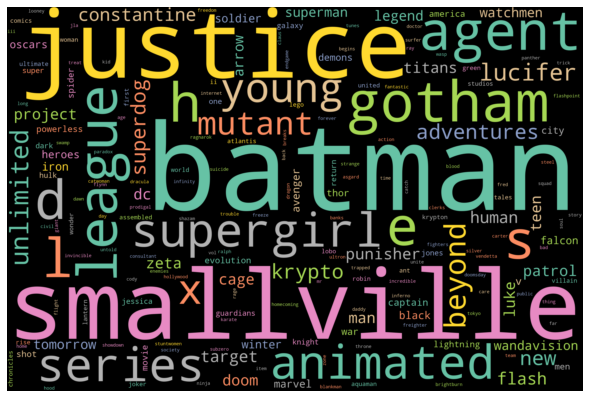

In [16]:
comment_words = ''
stopwords = set(STOPWORDS)
  
for val in dframe['Movie'].values:
      
    val = str(val)
  
    tokens = val.split()
      
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
    
    
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='black', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS).generate(comment_words)
  
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [17]:
def convert_runtime(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace('min','')
    return int(new_val)
converted_RunTime = dframe['RunTime'].apply(convert_runtime)
def convert_Year(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace('(','').replace(')', '').replace(' Video', '').replace(' TV Special','').replace('III ','').replace('–','').replace(' TV Movie','')
    return int(new_val)
converted_Year = dframe['Year'].apply(convert_Year)
converted_Year.value_counts

<bound method IndexOpsMixin.value_counts of 6           2019
7           2014
9           2019
10          2017
11          2018
          ...   
1685        2016
1686    20152021
1687    20152021
1688    20152021
1689    20152021
Name: Year, Length: 1247, dtype: int64>

In [18]:
dframe.columns

Index(['Movie', 'Year', 'Genre', 'RunTime', 'Rating', 'Director', 'Actor',
       'Description', 'IMDB_Score', 'Votes', 'Category'],
      dtype='object')

In [19]:
def convert_score(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    
    return int(val)
def convert_votes(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','')
    return int(new_val)
converted_Votes = dframe['Votes'].apply(convert_votes)
converted_IMDB_Score = dframe['IMDB_Score'].apply(convert_score)
dframe.insert(8, "C_IMDB_Score", converted_IMDB_Score, True)
dframe.insert(1, "C_Year", converted_Year, True)
dframe.insert(3, "C_RunTime", converted_RunTime, True)
dframe.insert(9, "C_Votes", converted_Votes, True)
dframe = dframe.drop(['IMDB_Score', 'Year', 'RunTime', 'Votes'], axis = 1)
dframe.head()

,Movie,C_Year,C_RunTime,Genre,Rating,Director,Actor,C_Votes,Description,C_IMDB_Score,Category
6,Avengers: Endgame,2019,181,"Action,Adventure,Drama",PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",880911,After the devastating events of Avengers: Infi...,8,Marvel
7,Guardians of the Galaxy,2014,121,"Action,Adventure,Comedy",PG-13,JamesGunn,"ChrisPratt,VinDiesel,BradleyCooper,ZoeSaldana",1066222,A group of intergalactic criminals must pull t...,8,Marvel
9,Spider-Man: Far from Home,2019,129,"Action,Adventure,Sci-Fi",PG-13,JonWatts,"TomHolland,SamuelL.Jackson,JakeGyllenhaal,Mari...",348047,Following the events of Avengers: Endgame (201...,7,Marvel
10,Thor: Ragnarok,2017,130,"Action,Adventure,Comedy",PG-13,TaikaWaititi,"ChrisHemsworth,TomHiddleston,CateBlanchett,Mar...",615860,"Imprisoned on the planet Sakaar, Thor must rac...",7,Marvel
11,Avengers: Infinity War,2018,149,"Action,Adventure,Sci-Fi",PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisHemsworth,MarkRuffalo,Chr...",881638,The Avengers and their allies must be willing ...,8,Marvel


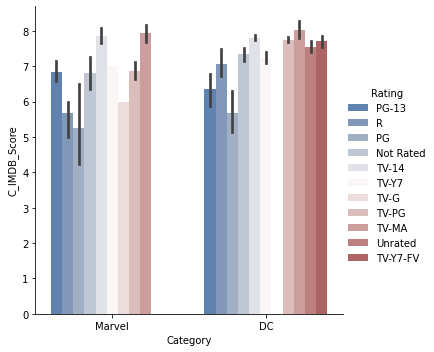

In [20]:
sns.catplot(x="Category", y="C_IMDB_Score", kind = 'bar', hue='Rating', palette="vlag", data=dframe)

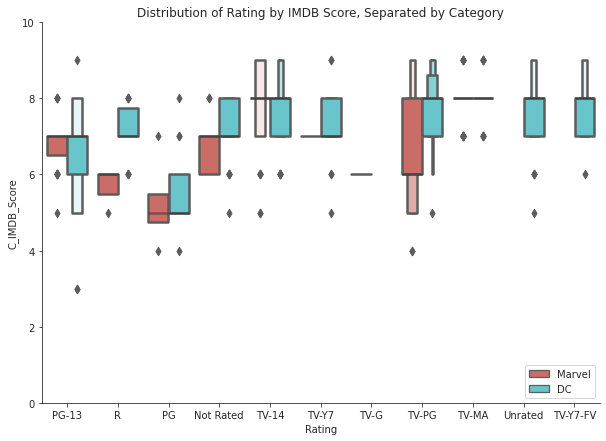

In [22]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
plt.ylim(0, 10)
plt.title("Distribution of Rating by IMDB Score, Separated by Category")
sns.boxenplot(x='Rating', y='C_IMDB_Score', data=dframe, palette='hls', hue='Category',linewidth=2.5)
plt.legend(loc='lower right', fancybox=True)
sns.despine()

In [23]:
dframe.head()

,Movie,C_Year,C_RunTime,Genre,Rating,Director,Actor,C_Votes,Description,C_IMDB_Score,Category
6,Avengers: Endgame,2019,181,"Action,Adventure,Drama",PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",880911,After the devastating events of Avengers: Infi...,8,Marvel
7,Guardians of the Galaxy,2014,121,"Action,Adventure,Comedy",PG-13,JamesGunn,"ChrisPratt,VinDiesel,BradleyCooper,ZoeSaldana",1066222,A group of intergalactic criminals must pull t...,8,Marvel
9,Spider-Man: Far from Home,2019,129,"Action,Adventure,Sci-Fi",PG-13,JonWatts,"TomHolland,SamuelL.Jackson,JakeGyllenhaal,Mari...",348047,Following the events of Avengers: Endgame (201...,7,Marvel
10,Thor: Ragnarok,2017,130,"Action,Adventure,Comedy",PG-13,TaikaWaititi,"ChrisHemsworth,TomHiddleston,CateBlanchett,Mar...",615860,"Imprisoned on the planet Sakaar, Thor must rac...",7,Marvel
11,Avengers: Infinity War,2018,149,"Action,Adventure,Sci-Fi",PG-13,"AnthonyRusso,JoeRusso","RobertDowneyJr.,ChrisHemsworth,MarkRuffalo,Chr...",881638,The Avengers and their allies must be willing ...,8,Marvel


In [24]:
group_avg_rating = dframe['C_IMDB_Score'].groupby(dframe['Category'])
group_avg_rating.mean() 

Category
DC        7.613131
Marvel    7.182879
Name: C_IMDB_Score, dtype: float64

In [25]:
dframe.groupby(['Category']).size()

Category
DC        990
Marvel    257
dtype: int64

In [26]:
group_avg_runtime = dframe['C_RunTime'].groupby(dframe['Category'])
group_avg_runtime.mean()

Category
DC        38.145455
Marvel    56.945525
Name: C_RunTime, dtype: float64

In [27]:
group_avg_Votes = dframe['C_Votes'].groupby(dframe['Category'])
group_avg_Votes.mean()

Category
DC        17242.289899
Marvel    69761.789883
Name: C_Votes, dtype: float64

In [28]:
dframe_rating = dframe.groupby('C_IMDB_Score')
dframe_rating.describe()

C_Year                                                   \
              count          mean           std     min          25%   
C_IMDB_Score                                                           
3               2.0  2.000500e+03  4.949747e+00  1997.0      1998.75   
4               4.0  1.000700e+07  1.155278e+07  1984.0      2005.75   
5              37.0  9.194707e+06  1.010842e+07  1982.0      2007.00   
6              97.0  1.321582e+07  9.537846e+06  1980.0      2017.00   
7             382.0  1.653269e+07  7.634148e+06  1978.0  19921995.00   
8             605.0  1.601626e+07  8.055392e+06  1999.0  19921995.00   
9             120.0  1.338043e+07  9.499839e+06  2008.0      2016.00   

                                                  C_RunTime              ...  \
                     50%          75%         max     count        mean  ...   
C_IMDB_Score                                                             ...   
3                 2000.5      2002.25      2004.0       2.0  114.500000  ...   
4             10007008.5  20012004.00  20012004.0       4.0   70.000000  ...   
5                 2018.0  20012004.00  20012004.0      37.0   74.000000  ...   
6             20012004.0  20012004.00  20172021.0      97.0   62.113402  ...   
7             20012011.0  20117017.75  20182019.0     382.0   40.183246  ...   
8             20012011.0  20132020.00  20182019.0     605.0   38.244628  ...   
9             20012011.0  20132020.00  20172019.0     120.0   38.658333  ...   

                            C_Votes                                          \
                 75%    max   count           mean            std       min   
C_IMDB_Score                                                                  
3             119.75  125.0     2.0  175029.500000   88096.312548  112736.0   
4              84.25  124.0     4.0    5383.750000    9319.989498      17.0   
5              92.00  187.0    37.0   52558.783784  122066.443498      19.0   
6              75.00  229.0    97.0   49656.206186  148397.501538      17.0   
7              43.00  175.0   382.0   36716.890052  144057.176998       6.0   
8              43.00  181.0   605.0   18442.710744  136140.130017       5.0   
9              43.00  152.0   120.0   22350.283333  215309.337292       6.0   

                                                         
                    25%       50%        75%        max  
C_IMDB_Score                                             
3             143882.75  175029.5  206176.25   237323.0  
4                 38.75    1119.0    6464.00    19280.0  
5                 22.00     848.0   34009.00   620461.0  
6                 29.00     235.0    3430.00   761947.0  
7                265.25     954.0    1891.25   960817.0  
8                584.00    1082.0    2116.00  1547852.0  
9                713.50    2082.0    3212.25  2361064.0  

[7 rows x 24 columns]

In [29]:
def ranker(df):
    df['movie_imdb_score_rank'] = np.arange(len(df)) + 1
    return df
dframe.sort_values('C_IMDB_Score', ascending=False, inplace=True)
dframe = dframe.groupby('Category').apply(ranker)
dframe.head()

,Movie,C_Year,C_RunTime,Genre,Rating,Director,Actor,C_Votes,Description,C_IMDB_Score,Category,movie_imdb_score_rank
230,WandaVision,2021,47,"Action,Comedy,Drama",TV-PG,MattShakman,"ElizabethOlsen,PaulBettany,KathrynHahn,JulianH...",17490,Wanda embarks on a troubling journey revisitin...,9,Marvel,1
1401,Lucifer,2016,43,"Crime,Drama,Fantasy",TV-14,AlrickRiley,"TomEllis,LaurenGerman,KevinAlejandro,D.B.Woodside",5631,Lucifer returns to hell to find an antidote fo...,9,DC,1
1220,Young Justice,2010,22,"Animation,Action,Adventure",TV-PG,MichaelChang,"JesseMcCartney,DanicaMcKellar,StephanieLemelin...",660,"When the cave is attacked, can Artemis and Rob...",9,DC,2
278,Agents of S.H.I.E.L.D.,20132020,43,"Action,Adventure,Drama",TV-PG,JesseBochco,"ClarkGregg,Ming-NaWen,BrettDalton,ChloeBennet",4623,"After her dramatic rescue from another planet,...",9,Marvel,2
281,Agents of S.H.I.E.L.D.,20132020,43,"Action,Adventure,Drama",TV-PG,GarryA.Brown,"ClarkGregg,Ming-NaWen,BrettDalton,ChloeBennet",2686,Dangerous facts about the ATCU are discovered ...,9,Marvel,3


In [30]:
num_score = dframe['C_IMDB_Score'].value_counts()
dframe[dframe.C_IMDB_Score ==9].head(len(num_score))

,Movie,C_Year,C_RunTime,Genre,Rating,Director,Actor,C_Votes,Description,C_IMDB_Score,Category,movie_imdb_score_rank
230,WandaVision,2021,47,"Action,Comedy,Drama",TV-PG,MattShakman,"ElizabethOlsen,PaulBettany,KathrynHahn,JulianH...",17490,Wanda embarks on a troubling journey revisitin...,9,Marvel,1
1401,Lucifer,2016,43,"Crime,Drama,Fantasy",TV-14,AlrickRiley,"TomEllis,LaurenGerman,KevinAlejandro,D.B.Woodside",5631,Lucifer returns to hell to find an antidote fo...,9,DC,1
1220,Young Justice,2010,22,"Animation,Action,Adventure",TV-PG,MichaelChang,"JesseMcCartney,DanicaMcKellar,StephanieLemelin...",660,"When the cave is attacked, can Artemis and Rob...",9,DC,2
278,Agents of S.H.I.E.L.D.,20132020,43,"Action,Adventure,Drama",TV-PG,JesseBochco,"ClarkGregg,Ming-NaWen,BrettDalton,ChloeBennet",4623,"After her dramatic rescue from another planet,...",9,Marvel,2
281,Agents of S.H.I.E.L.D.,20132020,43,"Action,Adventure,Drama",TV-PG,GarryA.Brown,"ClarkGregg,Ming-NaWen,BrettDalton,ChloeBennet",2686,Dangerous facts about the ATCU are discovered ...,9,Marvel,3
282,Agents of S.H.I.E.L.D.,20132020,43,"Action,Adventure,Drama",TV-PG,KateWoods,"ClarkGregg,Ming-NaWen,BrettDalton,ChloeBennet",2710,Ward's vendetta and plan for revenge against S...,9,Marvel,4
283,Agents of S.H.I.E.L.D.,20132020,42,"Action,Adventure,Drama",TV-PG,VincentMisiano,"ClarkGregg,Ming-NaWen,BrettDalton,ChloeBennet",2892,"S.H.I.E.L.D battles Hydra head-to-head, which ...",9,Marvel,5


In [31]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 230 to 415
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Movie                  1247 non-null   object
 1   C_Year                 1247 non-null   int64 
 2   C_RunTime              1247 non-null   int64 
 3   Genre                  1247 non-null   object
 4   Rating                 1247 non-null   object
 5   Director               1247 non-null   object
 6   Actor                  1247 non-null   object
 7   C_Votes                1247 non-null   int64 
 8   Description            1247 non-null   object
 9   C_IMDB_Score           1247 non-null   int64 
 10  Category               1247 non-null   object
 11  movie_imdb_score_rank  1247 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 158.9+ KB


In [32]:
v = dframe['C_IMDB_Score']        # Number of votes for the movie
R = dframe['C_Votes']             # Vote average of a movie which is a number from 0 to 10
C = dframe['C_Votes'].mean()      # The mean vote across the whole report 
m = dframe['C_IMDB_Score'].quantile(0.7)
dframe['Weighted_average'] = ((R*v)+(C*m))/(v+m)
dframe.head()

,Movie,C_Year,C_RunTime,Genre,Rating,Director,Actor,C_Votes,Description,C_IMDB_Score,Category,movie_imdb_score_rank,Weighted_average
230,WandaVision,2021,47,"Action,Comedy,Drama",TV-PG,MattShakman,"ElizabethOlsen,PaulBettany,KathrynHahn,JulianH...",17490,Wanda embarks on a troubling journey revisitin...,9,Marvel,1,22467.071371
1401,Lucifer,2016,43,"Crime,Drama,Fantasy",TV-14,AlrickRiley,"TomEllis,LaurenGerman,KevinAlejandro,D.B.Woodside",5631,Lucifer returns to hell to find an antidote fo...,9,DC,1,16188.777254
1220,Young Justice,2010,22,"Animation,Action,Adventure",TV-PG,MichaelChang,"JesseMcCartney,DanicaMcKellar,StephanieLemelin...",660,"When the cave is attacked, can Artemis and Rob...",9,DC,2,13557.071371
278,Agents of S.H.I.E.L.D.,20132020,43,"Action,Adventure,Drama",TV-PG,JesseBochco,"ClarkGregg,Ming-NaWen,BrettDalton,ChloeBennet",4623,"After her dramatic rescue from another planet,...",9,Marvel,2,15655.130195
281,Agents of S.H.I.E.L.D.,20132020,43,"Action,Adventure,Drama",TV-PG,GarryA.Brown,"ClarkGregg,Ming-NaWen,BrettDalton,ChloeBennet",2686,Dangerous facts about the ATCU are discovered ...,9,Marvel,3,14629.659607


In [33]:
movie_rankings = dframe.sort_values('Weighted_average',ascending=False)
movie_rankings[['Movie','C_Votes','C_IMDB_Score', 'movie_imdb_score_rank','Weighted_average']]

,Movie,C_Votes,C_IMDB_Score,movie_imdb_score_rank,Weighted_average
394,The Dark Knight,2361064,9,40,1.263183e+06
399,The Dark Knight Rises,1547852,8,410,7.879591e+05
408,Batman Begins,1334536,8,587,6.813011e+05
22,The Avengers,1283515,8,111,6.557906e+05
7,Guardians of the Galaxy,1066222,8,31,5.471441e+05
...,...,...,...,...,...
1493,Young Justice,301,9,42,1.336701e+04
981,Teen Titans,276,9,13,1.335378e+04
1038,The Batman,154,9,29,1.328919e+04
789,Duck Dodgers,111,9,17,1.326642e+04


Text(0, 0.5, 'Movie Title')

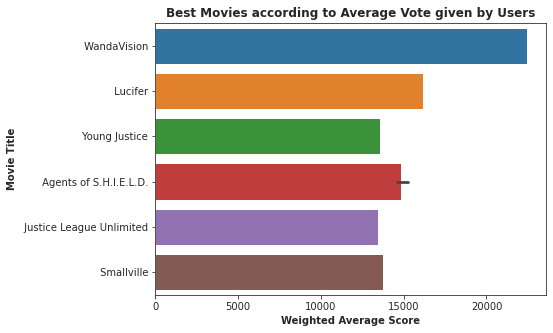

In [34]:
weighted_average = dframe.sort_values('Weighted_average',ascending=False)
plt.figure(figsize=(7,5))
axis1 = sns.barplot(x = dframe['Weighted_average'].head(10),y = dframe['Movie'].head(10))

plt.title('Best Movies according to Average Vote given by Users',weight='bold')
plt.xlabel('Weighted Average Score',weight='bold')
plt.ylabel('Movie Title',weight='bold')